<div align="center">

# Лабораторна робота №3  

## Структури для роботи з великими обсягами даних в Python  

</div>

### Мета роботи  
отримати навички роботи із структурами для зберігання в Python
(python, numpy, pandas, numpy array, dataframe, timeit)  

---
<div align="center">
    
## Хід виконання роботи:
</div>

### -Імпорт бібліотек та вибір датасета:


In [2]:
import os
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

data_folder = "data"
file_path = os.path.join(data_folder, "adult.csv")

os.makedirs(data_folder, exist_ok=True)

if not os.path.exists(file_path):
    urllib.request.urlretrieve(url, file_path)
    print("Файл завантажено.")
else:
    print("Файл вже існує.")

columns = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]
df = pd.read_csv(file_path, names=columns, na_values=["?", " ?"], skipinitialspace=True)

df.tail(10)


Файл вже існує.


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


---
### -Боротьба зі зниклими даними:

In [3]:
print("\nПочаткові пропущені значення за колонками:")
print(df.isnull().sum())

df_drop = df.dropna()
df_fill = df.copy()

for col in df_fill.columns:
    if df_fill[col].dtype in ['int64', 'float64']:
        df_fill[col] = df_fill[col].fillna(df_fill[col].mean())
    else:
        df_fill[col] = df_fill[col].fillna(df_fill[col].mode()[0])

print("\nМодальні значення для категоріальних колонок:")
for col in ['workclass', 'occupation', 'native_country']:
    print(f"{col}: {df[col].mode()[0]} ({df[col].value_counts().max()} повторень)")

print("\nDataFrame після видалення пропущених значень:", df_drop.shape)
print("\nDataFrame після заповнення пропущених значень:", df_fill.shape)

numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

np_numeric = df[numeric_columns].to_numpy()
np_categorical = df[categorical_columns].to_numpy()

np_numeric_clean = np_numeric[~np.isnan(np_numeric).any(axis=1)]

means = np.nanmean(np_numeric, axis=0)
inds = np.where(np.isnan(np_numeric))
np_numeric[inds] = np.take(means, inds[1])

for col in range(np_categorical.shape[1]):
    non_nan_values = np_categorical[:, col][~pd.isna(np_categorical[:, col])]
    if len(non_nan_values) > 0:
        most_frequent = np.unique(non_nan_values, return_counts=True)[0][np.argmax(np.unique(non_nan_values, return_counts=True)[1])]
        np_categorical[:, col] = np.where(pd.isna(np_categorical[:, col]), most_frequent, np_categorical[:, col])

np_clean = np.hstack((np_numeric_clean, np_categorical))

print("\nNumpy array після видалення пропущених значень:", np_numeric_clean.shape)
print("\nNumpy array після заповнення пропущених значень:", np_clean.shape)

print("\nПерші 10 рядків DataFrame (після заповнення пропущених значень):")
print(df_fill.tail(10))

print("\nПерші 10 рядків Numpy array (після заповнення пропущених значень):")
print(np_clean[:10])



Початкові пропущені значення за колонками:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Модальні значення для категоріальних колонок:
workclass: Private (22696 повторень)
occupation: Prof-specialty (4140 повторень)
native_country: United-States (29170 повторень)

DataFrame після видалення пропущених значень: (30162, 15)

DataFrame після заповнення пропущених значень: (32561, 15)

Numpy array після видалення пропущених значень: (32561, 6)

Numpy array після заповнення пропущених значень: (32561, 15)

Перші 10 рядків DataFrame (після заповнення пропущених значень):
       age     workclass  fnlwgt     education  education_num  \
32551   32       Private   34066          10th    

---
### -Нормування датасета:

In [4]:
def normalize_data(data):
    if isinstance(data, pd.DataFrame):
        data_copy = data.copy()
        numeric_cols = data_copy.select_dtypes(include=['number']).columns
        data_copy[numeric_cols] = data_copy[numeric_cols].apply(
            lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else x * 0
        )
        return data_copy
    elif isinstance(data, np.ndarray):
        data_min = np.nanmin(data, axis=0)
        data_max = np.nanmax(data, axis=0)
        diff = data_max - data_min
        diff[diff == 0] = 1
        return (data - data_min) / diff
    else:
        raise TypeError("Підтримуються лише DataFrame та numpy array")

# def standardize_data(data):

#     if isinstance(data, pd.DataFrame):
#         data_copy = data.copy()
#         numeric_cols = data_copy.select_dtypes(include=['number']).columns
#         data_copy[numeric_cols] = data_copy[numeric_cols].apply(lambda x: (x - x.mean()) / x.std() if x.std() != 0 else x)
#         return data_copy
#     elif isinstance(data, np.ndarray):
#         data_mean = np.nanmean(data, axis=0)
#         data_std = np.nanstd(data, axis=0)
#         data_std[data_std == 0] = 1
#         return (data - data_mean) / data_std
#     else:
#         raise TypeError("Підтримуються лише DataFrame та numpy array")

df_processed = df_fill.copy()
df_normalized = normalize_data(df_processed)
# df_standardized = standardize_data(df_processed)

np_numeric = df_fill.select_dtypes(include=['number']).to_numpy()
np_normalized = normalize_data(np_numeric)
# np_standardized = standardize_data(np_numeric)

print("Нормалізовані числові дані (DataFrame):\n", df_normalized.head())
# print("Стандартизовані числові дані (DataFrame):\n", df_standardized.head())
print("Нормалізовані числові дані (Numpy):\n", np_normalized[:5])
# print("Стандартизовані числові дані (Numpy):\n", np_standardized[:5])



Нормалізовані числові дані (DataFrame):
         age         workclass    fnlwgt  education  education_num  \
0  0.301370         State-gov  0.044302  Bachelors       0.800000   
1  0.452055  Self-emp-not-inc  0.048238  Bachelors       0.800000   
2  0.287671           Private  0.138113    HS-grad       0.533333   
3  0.493151           Private  0.151068       11th       0.400000   
4  0.150685           Private  0.221488  Bachelors       0.800000   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0       0.02174           0.0

---
### -Гістограма:

Статистика для атрибуту 'age':
age
17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Name: count, Length: 73, dtype: int64


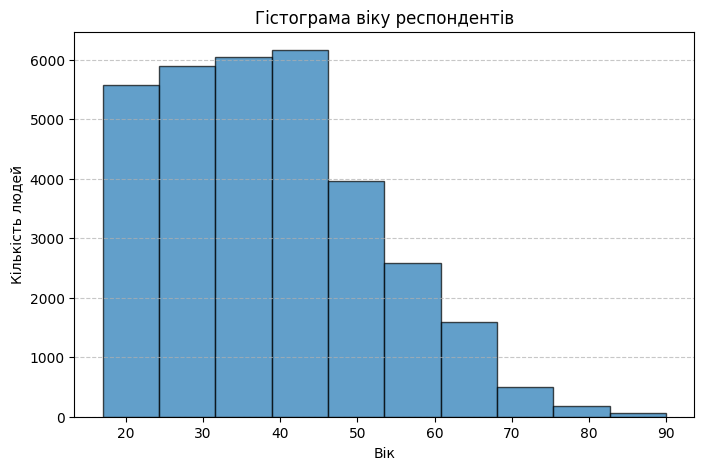

In [5]:
age_counts = df['age'].value_counts().sort_index()
print("Статистика для атрибуту 'age':")
print(age_counts)

plt.figure(figsize=(8, 5))
plt.hist(df["age"], bins=10, edgecolor="black", alpha=0.7)
plt.xlabel("Вік")
plt.ylabel("Кількість людей")
plt.title("Гістограма віку респондентів")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

---
### -Графік залежності:

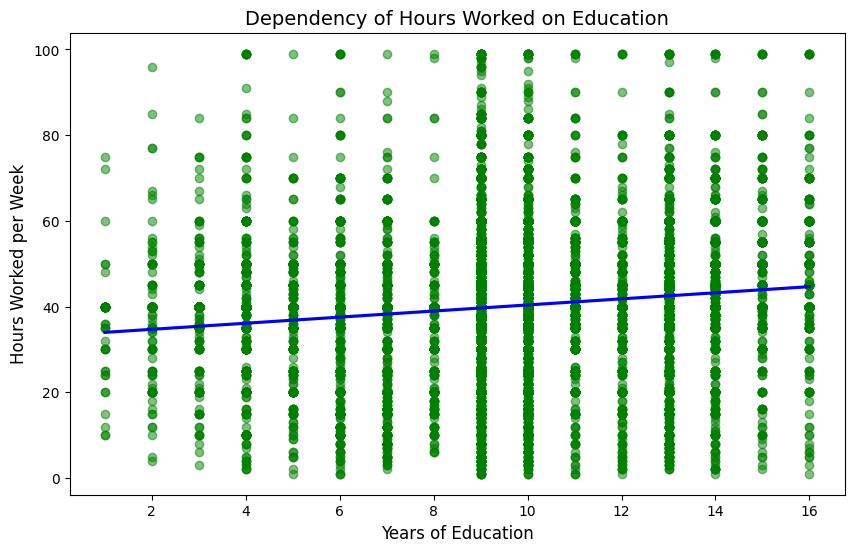

In [39]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x=df["education_num"], y=df["hours_per_week"], 
    scatter_kws={'color': 'green', 'alpha': 0.5}, 
    line_kws={'color': 'blue'}, 
    ci=None
)

plt.xlabel("Years of Education", fontsize=12)
plt.ylabel("Hours Worked per Week", fontsize=12)
plt.title("Dependency of Hours Worked on Education", fontsize=14)
plt.show()

---
### -Підрахунок коефіцієнтів Пірсона та Спірмена для двох integer/real атрибутів:

In [47]:
col1, col2 = "education_num", "hours_per_week"

pearson_corr, _ = pearsonr(df_fill[col1], df_fill[col2])
spearman_corr, _ = spearmanr(df_fill[col1], df_fill[col2])

print(f"Коефіцієнт кореляції Пірсона між {col1} і {col2}: {pearson_corr:.6f}")
print(f"Коефіцієнт кореляції Спірмена між {col1} і {col2}: {spearman_corr:.6f}")

Коефіцієнт кореляції Пірсона між education_num і hours_per_week: 0.148123
Коефіцієнт кореляції Спірмена між education_num і hours_per_week: 0.167215


---
### -One Hot Encoding для раси респондентів:

In [50]:
categorical_feature = "race"

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_feature = encoder.fit_transform(df_fill[[categorical_feature]])
encoded_columns = encoder.get_feature_names_out([categorical_feature])
df_encoded = pd.DataFrame(encoded_feature, columns=encoded_columns, index=df_fill.index)
df_final = pd.concat([df_fill.drop(columns=[categorical_feature]), df_encoded], axis=1)

print("Перші рядки DataFrame після One Hot Encoding:")
print(df_final.head())

Перші рядки DataFrame після One Hot Encoding:
   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship     sex  capital_gain  \
0       Never-married       Adm-clerical  Not-in-family    Male          2174   
1  Married-civ-spouse    Exec-managerial        Husband    Male             0   
2            Divorced  Handlers-cleaners  Not-in-family    Male             0   
3  Married-civ-spouse  Handlers-cleaners        Husband    Male             0   
4  Married-civ-spouse     Prof-specialty           Wife  Female             0   

   capital_loss  hours_per_week native_country income  \
0             0              40  Unit

---
### -Візуалізація багатовимірних даних:

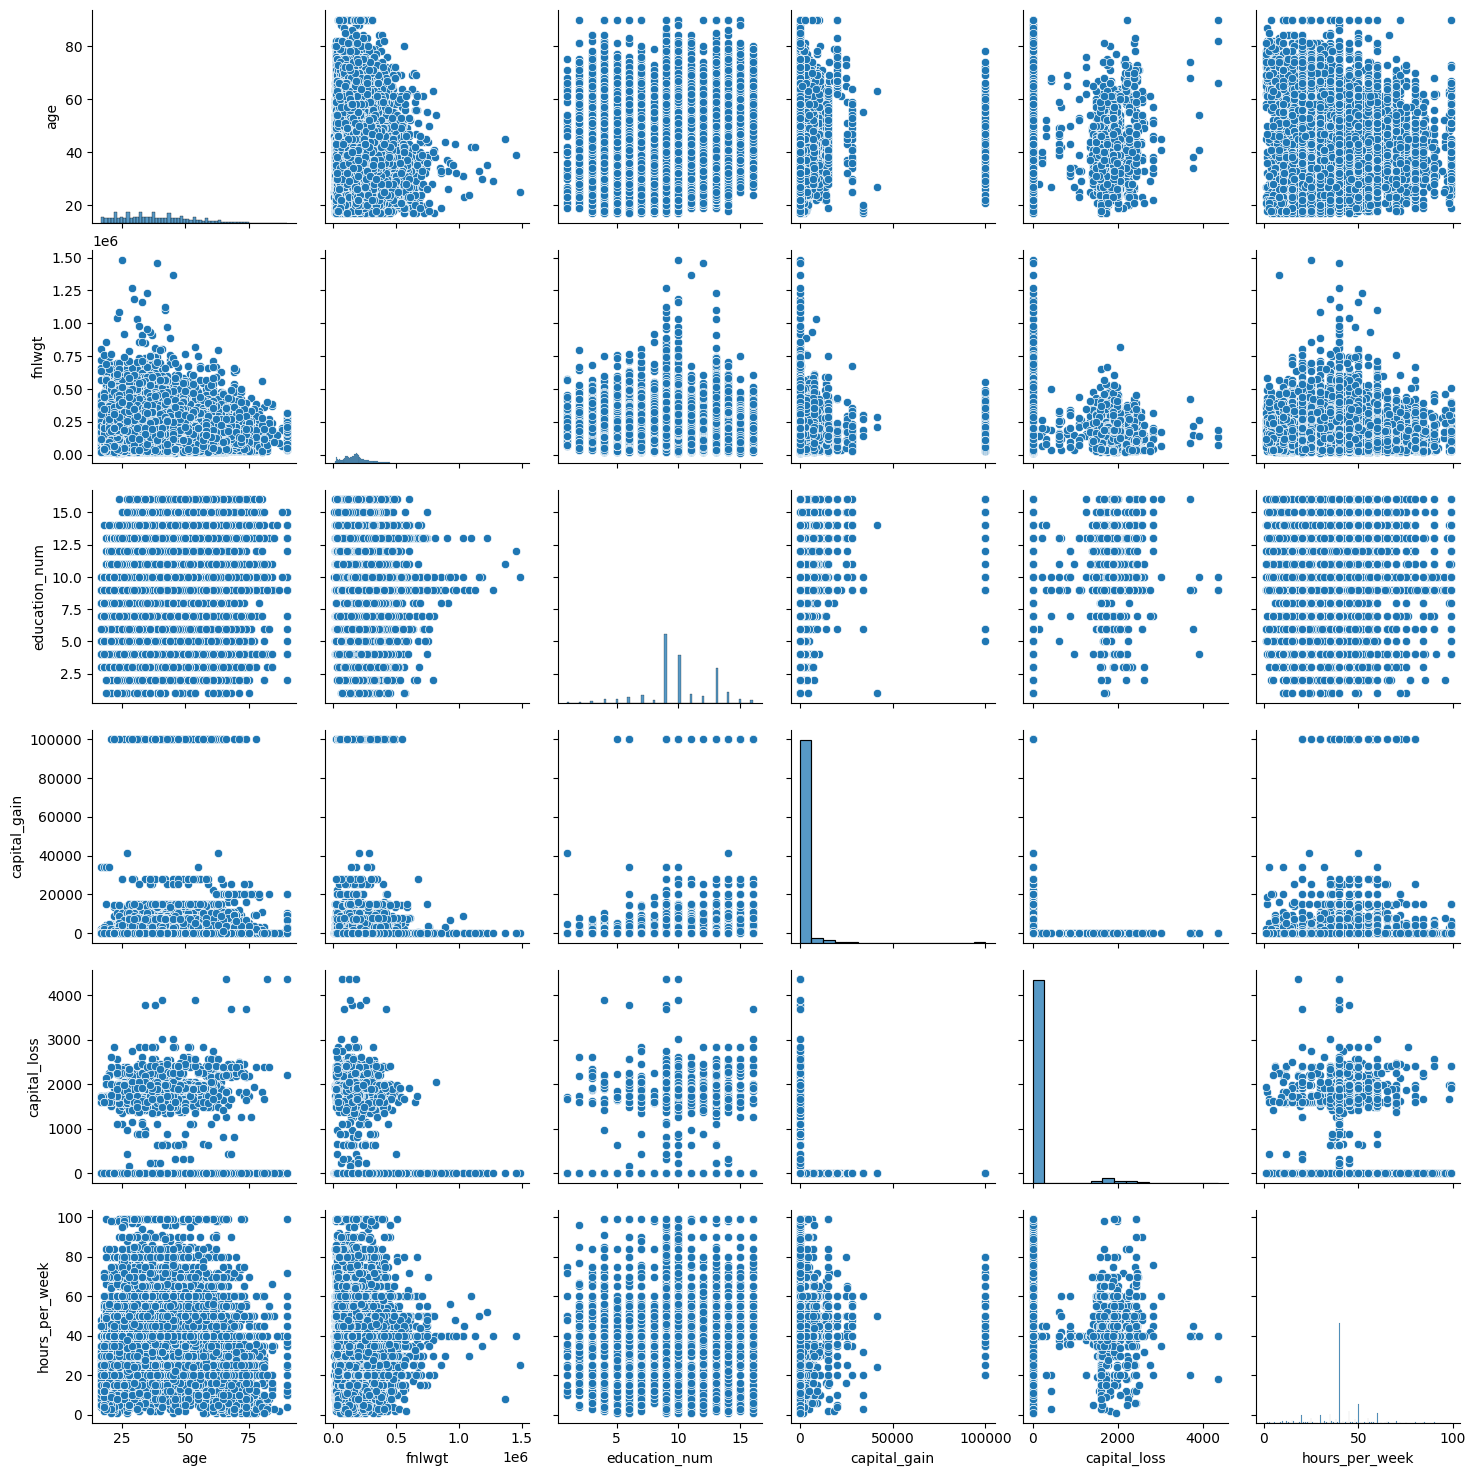

In [51]:
numeric_df = df_fill.select_dtypes(include=['number'])

sns.pairplot(numeric_df)
plt.show()